# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

https://wiki.csc.calpoly.edu/datasets/wiki/Houses

To make it simpler for this assignment, the dataset has been slightly modified.  It contains the following fields:

1.	MLS: Multiple listing service number for the house (unique ID).
2.	Price: the most recent listing price of the house (in dollars).
3.	Bedrooms: number of bedrooms.
4.	Bathrooms: number of bathrooms.
5.	Size: size of the house in square feet.
6.	Price/SQ.ft: price of the house per square foot.

The model predict the housing price given the square footage of the house.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("/content/COEN240_ML/Project1_LinearRegression/housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


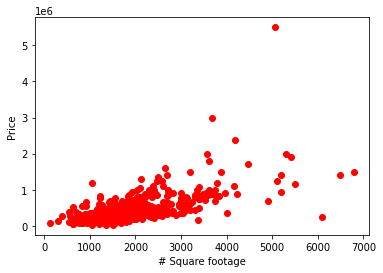

In [3]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [4]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z = np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Perform gradient descent

In [11]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.01

N = len(y)

# Number of epochs
MAX_EPOCHS = 20000

mse_array = []  

# Loop for 2000 epochs
for itr in range (0, MAX_EPOCHS):
    # X_train is 781x1 and y_train is 781x1
  
    # TO DO: write update equation
    temp_w0 = 0
    for i in range(0, N):
      temp_w0 = temp_w0 + (w0 + w1*X_train[i] - y_train[i])
    temp_w0 = w0 - nu/N * temp_w0

    temp_w1 = 0
    for i in range(0, N):
      temp_w1 = temp_w1 + (w0 + w1*X_train[i] - y_train[i]) * X_train[i]
    temp_w1 = w1 - nu/N * temp_w1
   
    w0 = temp_w0
    w1 = temp_w1

    # TO DO: compute mse
    mse = 0
    for i in range(0, N):
      mse = mse + (w0 + w1*X_train[i] - y_train[i])**2
    mse = mse/(2*N)
    
    # Store MSE results for the plot
    mse_array.append(mse)

In [12]:
### IMPORTANT ###
## If non-vectorized, then need to form w
w = np.array([w0,w1])

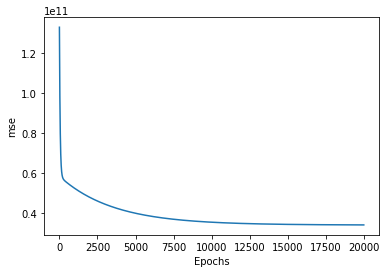

In [13]:
### Plot mse vs iterations
plt.plot(mse_array)  #
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

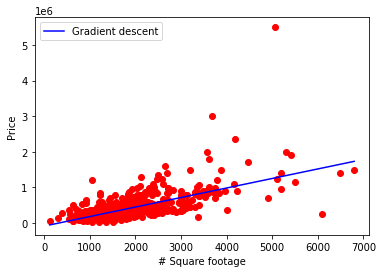

In [14]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()


In [15]:
### Print the weight vector w
print (w)

[[ -53291.49706652]
 [1785324.41852075]]


In [16]:
### Predict the price of a 5000 sqft house
### Remember to normalize it first

print(w0 + w1*((5000-Xmin)/max_min))


[1250957.47933786]
